I'm going to explore which areas in Data Science show the most potential, based on salary trends across different company sizes and job titles.

This project focuses on predicting individual salaries using two key features: company size and job title. These attributes play a significant role in determining compensation across industries and locations. The goal is to explore how professional role and organizational scale affect salary levels using machine learning.

The dataset used contains 607 records and 12 columns, derived from a larger original dataset available on Kaggle. The target variable is salary_in_usd, representing normalized salaries in U.S. dollars for better comparability.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#loading the data
df = pd.read_csv('ds_salaries.csv')
df.head()
#table.info()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Data Preprocessing

In [4]:
df.shape

(607, 12)

In [5]:
df.isnull().sum()


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no missing values, so there is no need to dropna

In [6]:
# Dropping Unnamed Column beacuse it is just an index column
# Drop 'salary' and 'salary_currency' columns since 'salary_in_usd' is already available
df.drop(columns = 'Unnamed: 0', axis = 1, inplace=True)
df.drop(columns=['salary'], inplace=True)
df.drop(columns=['salary_currency'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [8]:
print(df.nunique())

work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64


In [9]:
# All areas in DS
print(df['job_title'].unique())

['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Finance Data Anal

In [10]:
def categorize_job(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'machine learning' in title or 'ml' in title:
        return 'Machine Learning Engineer'
    elif 'research' in title:
        return 'Research Scientist'
    elif 'manager' in title or 'director' in title or 'head' in title:
        return 'Management'
    else:
        return 'Other'

df['job_category'] = df['job_title'].apply(categorize_job)

In [11]:
print(df['job_category'].unique())
df.drop(columns=['job_title'], inplace=True)


['Data Scientist' 'Machine Learning Engineer' 'Data Engineer'
 'Data Analyst' 'Other' 'Management' 'Research Scientist']


In [12]:
df.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2020,MI,FT,79833,DE,0,DE,L,Data Scientist
1,2020,SE,FT,260000,JP,0,JP,S,Machine Learning Engineer
2,2020,SE,FT,109024,GB,50,GB,M,Data Engineer
3,2020,MI,FT,20000,HN,0,HN,S,Data Analyst
4,2020,SE,FT,150000,US,50,US,L,Machine Learning Engineer


In [13]:
exp_level_map = {
    'EN': 'Junior',
    'MI': 'Middle',
    'SE': 'Senior',
    'EX': 'Teamlead'
}
df['experience_level'] = df['experience_level'].map(exp_level_map)


In [14]:
emp_type_map = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
}
df['employment_type'] = df['employment_type'].map(emp_type_map)


In [15]:
size_map = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}
df['company_size'] = df['company_size'].map(size_map)

In [16]:
df.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2020,Middle,Full-time,79833,DE,0,DE,Large,Data Scientist
1,2020,Senior,Full-time,260000,JP,0,JP,Small,Machine Learning Engineer
2,2020,Senior,Full-time,109024,GB,50,GB,Medium,Data Engineer
3,2020,Middle,Full-time,20000,HN,0,HN,Small,Data Analyst
4,2020,Senior,Full-time,150000,US,50,US,Large,Machine Learning Engineer


Data preporation end

Text(0.5, 1.0, 'Salary Trends Over Years')

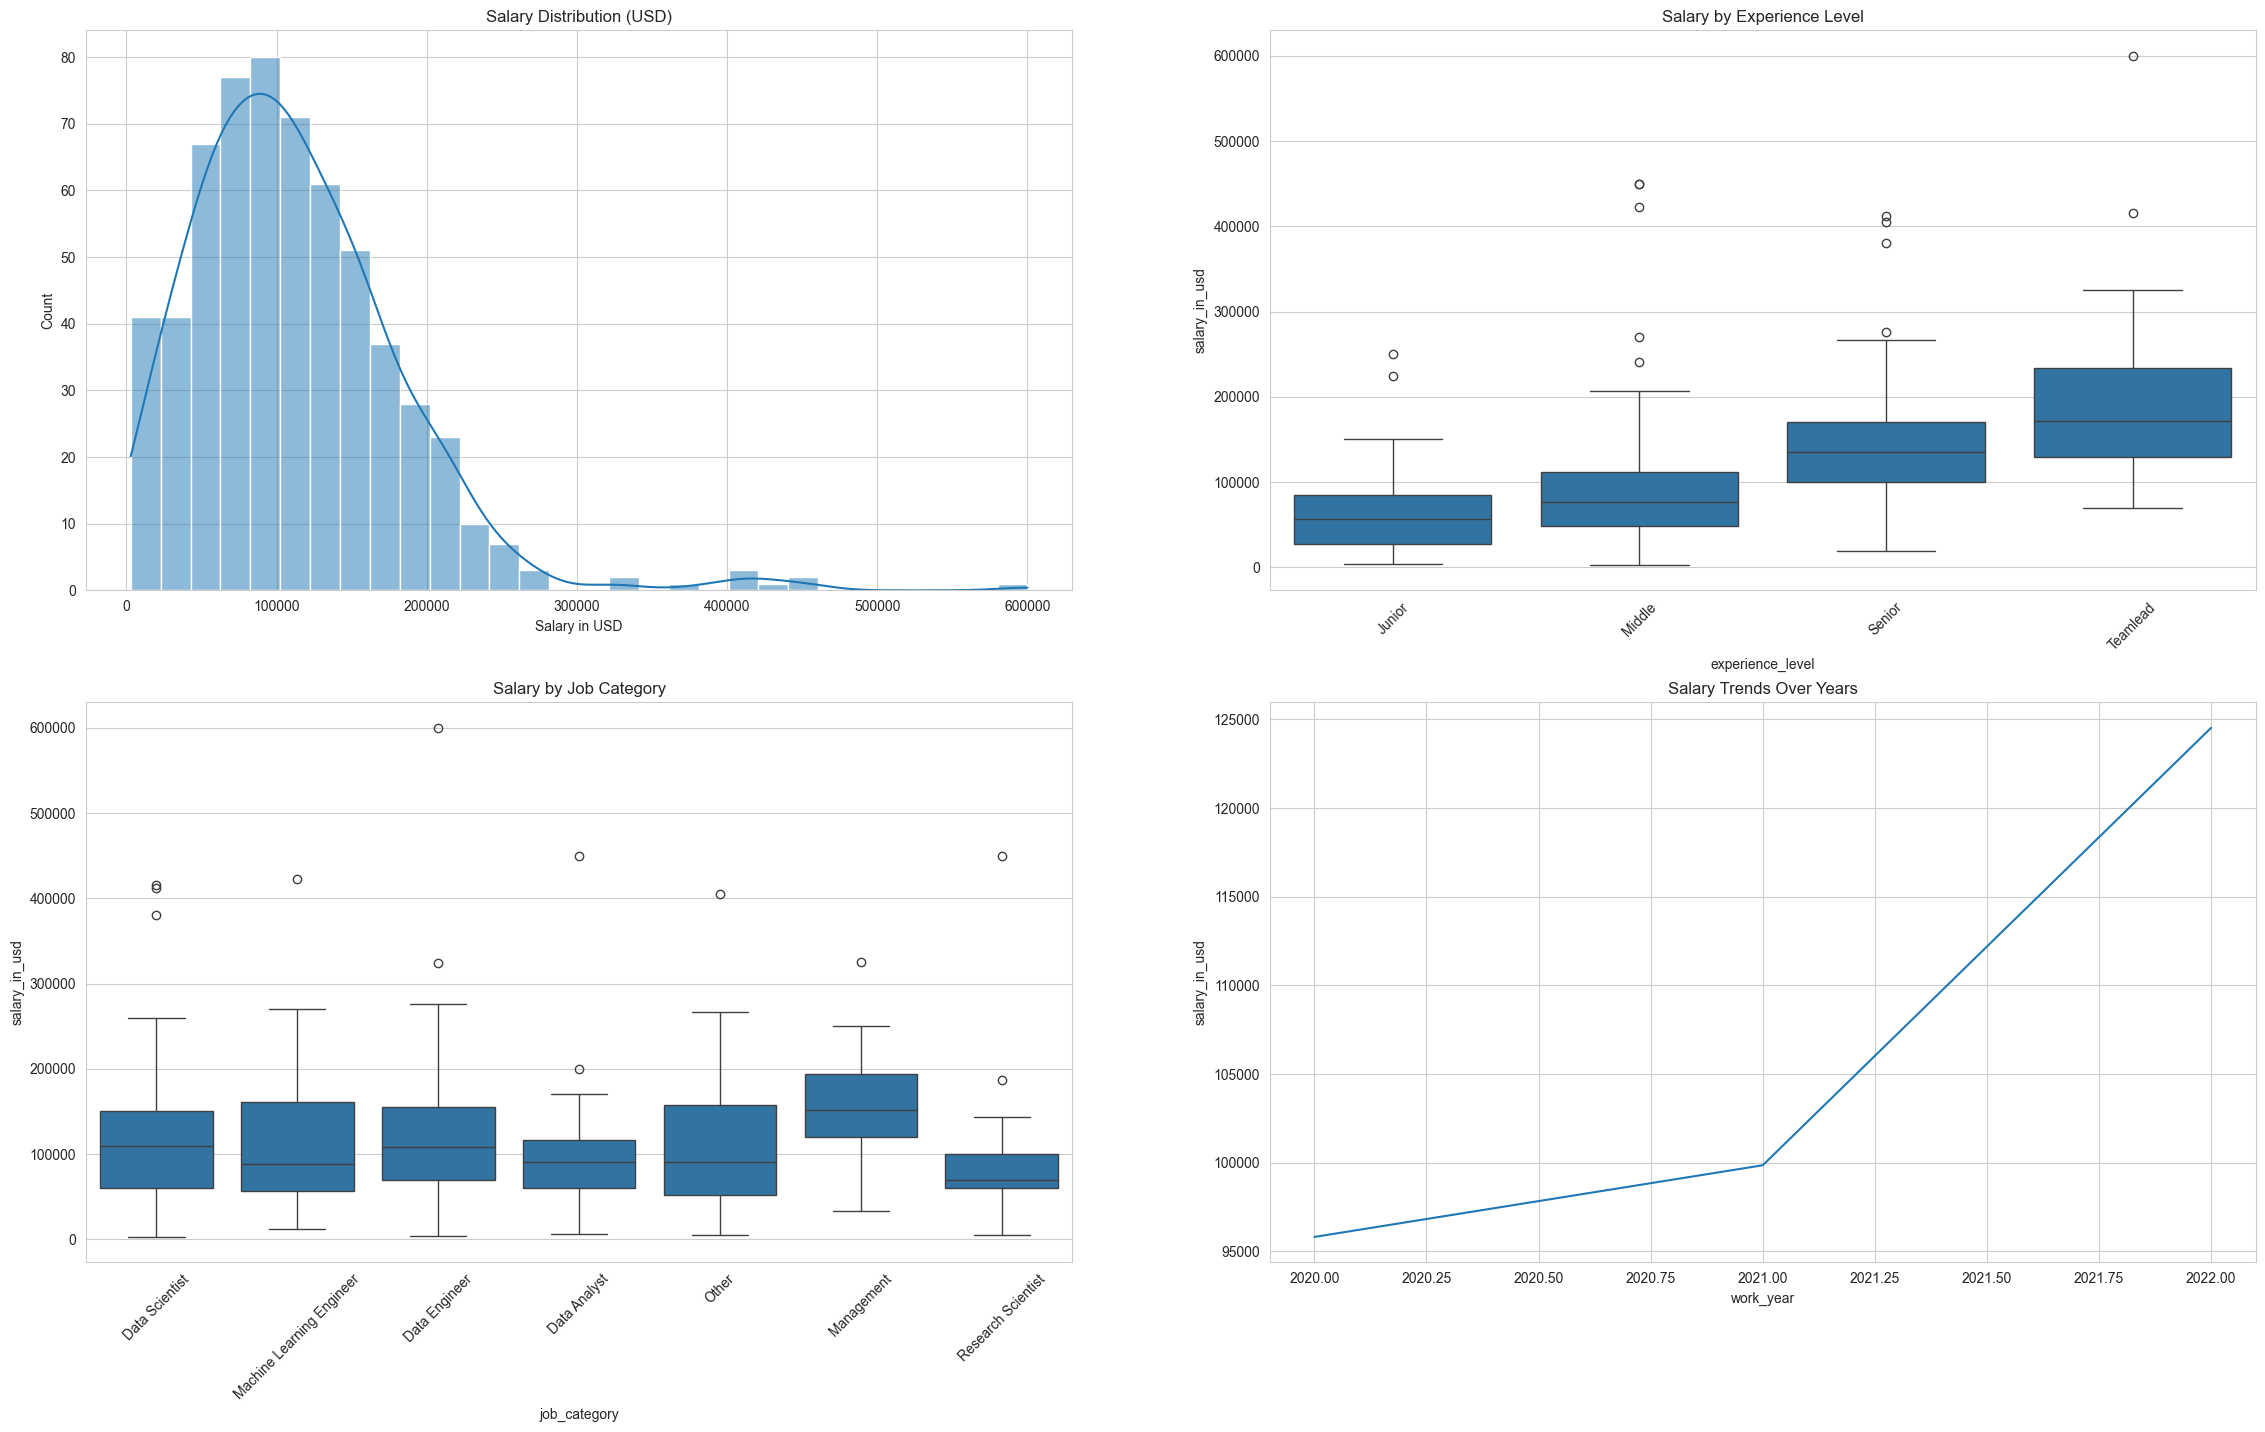

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(28, 16))
plt.subplot(2, 2, 1)
sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title('Salary Distribution (USD)')
plt.xlabel('Salary in USD')
plt.subplot(2, 2, 2)
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['Junior', 'Middle', 'Senior', 'Teamlead'])
plt.title('Salary by Experience Level')
plt.xticks(rotation=45)
plt.subplot(2, 2, 3)
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
plt.title('Salary by Job Category')
plt.xticks(rotation=45)
plt.subplot(2, 2, 4)
sns.lineplot(x='work_year', y='salary_in_usd', data=df, errorbar=None)
plt.title('Salary Trends Over Years')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
    
junior_df = df[df['experience_level'] == 'Junior'].copy()

y = junior_df['salary_in_usd']

X = junior_df.drop(columns=['salary_in_usd', 'experience_level'])

categorical_features = ['employment_type', 'employee_residence', 'company_location', 'company_size', 'job_category']
numeric_features = ['work_year', 'remote_ratio']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

knn_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

lr_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_pipeline.fit(X_train, y_train)
knn_preds = knn_pipeline.predict(X_test)
print("KNN Regressor:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, knn_preds)))
print("R²:", r2_score(y_test, knn_preds))


lr_pipeline.fit(X_train, y_train)
lr_preds = lr_pipeline.predict(X_test)
print("\nLinear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds))) 
print("R²:", r2_score(y_test, lr_preds))


📦 KNN Regressor:
RMSE: 35132.99381344487
R²: -0.09093842116045314

📦 Linear Regression:
RMSE: 41955.35973921644
R²: -0.5557679384156875


Two regression models — K-Nearest Neighbors (KNN) and Linear Regression — were trained to predict salaries for Junior-level professionals. The results are as follows. These results indicate that both models performed poorly, with R² values below zero, meaning that their predictions are worse than simply predicting the average salary. The high RMSE values suggest significant prediction errors.



In [ ]:
def train_models_for_level(df, level_name):
    print(f"\nResults for: {level_name} level")

    level_df = df[df['experience_level'] == level_name].copy()

    y = level_df['salary_in_usd']
    X = level_df.drop(columns=['salary_in_usd', 'experience_level'])

    categorical_features = ['employment_type', 'employee_residence', 'company_location', 'company_size', 'job_category']
    numeric_features = ['work_year', 'remote_ratio']

    preprocessor = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

    knn_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', KNeighborsRegressor(n_neighbors=5))
    ])
    lr_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', LinearRegression())
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn_pipeline.fit(X_train, y_train)
    knn_preds = knn_pipeline.predict(X_test)
    print("KNN Regressor:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, knn_preds)))
    print("R²:", r2_score(y_test, knn_preds))

    lr_pipeline.fit(X_train, y_train)
    lr_preds = lr_pipeline.predict(X_test)
    print("Linear Regression:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
    print("R²:", r2_score(y_test, lr_preds))
train_models_for_level(df, 'Middle')
train_models_for_level(df, 'Senior')



🔍 Results for: Junior level
📦 KNN Regressor:
RMSE: 35132.99381344487
R²: -0.09093842116045314
📦 Linear Regression:
RMSE: 41955.35973921644
R²: -0.5557679384156875

🔍 Results for: Middle level
📦 KNN Regressor:
RMSE: 58997.57958532292
R²: 0.15876402682634239
📦 Linear Regression:
RMSE: 51489.216438152696
R²: 0.3592597418887583

🔍 Results for: Senior level
📦 KNN Regressor:
RMSE: 60220.554205342305
R²: -0.07883283413975084
📦 Linear Regression:
RMSE: 47623.30430546591
R²: 0.32531087453836727


**Not good results** — the current models (KNN and Linear Regression) show limited performance.  
To improve accuracy, I need to try more powerful models like **Random Forest**, **XGBoost**, or **Ridge Regression**.


In [30]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def train_models_for_level(df, level_name):
    print(f"\n Results for: {level_name} level")

    level_df = df[df['experience_level'] == level_name].copy()

    y = level_df['salary_in_usd']
    X = level_df.drop(columns=['salary_in_usd', 'experience_level'])

    categorical_features = ['employment_type', 'employee_residence', 'company_location', 'company_size', 'job_category']
    numeric_features = ['work_year', 'remote_ratio']

    preprocessor = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

    rf_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    xgb_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
    ])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    rf_pipeline.fit(X_train, y_train)
    rf_preds = rf_pipeline.predict(X_test)
    print(" Random Forest Regressor:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
    print("R²:", r2_score(y_test, rf_preds))
    xgb_pipeline.fit(X_train, y_train)
    xgb_preds = xgb_pipeline.predict(X_test)
    print("📦 XGBoost Regressor:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
    print("R²:", r2_score(y_test, xgb_preds))
train_models_for_level(df, 'Junior')
train_models_for_level(df, 'Middle')
train_models_for_level(df, 'Senior')






 Results for: Junior level
 Random Forest Regressor:
RMSE: 21939.483489344424
R²: 0.5745752848837793
📦 XGBoost Regressor:
RMSE: 27199.363521964995
R²: 0.34613609313964844

 Results for: Middle level
 Random Forest Regressor:
RMSE: 57418.35535849509
R²: 0.20319703069627726
📦 XGBoost Regressor:
RMSE: 57499.35429202662
R²: 0.20094746351242065

 Results for: Senior level
 Random Forest Regressor:
RMSE: 48751.676266567985
R²: 0.2929603557898304
📦 XGBoost Regressor:
RMSE: 46606.97836161448
R²: 0.35380059480667114


### 🔍 Model Comparison Summary

| Level   | Best Model       | RMSE ↓    | R² ↑    |
|---------|------------------|-----------|---------|
| Junior  | Random Forest ✅ | 21,939    | 0.575   |
| Middle  | Random Forest ✅ | 57,418    | 0.203   |
| Senior  | XGBoost ✅        | 46,607    | 0.354   |

**✅ Random Forest performs best overall, except for Senior level where XGBoost wins.**


work_year             0
experience_level      0
employment_type       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
job_category          0
dtype: int64
42
experience_level
Senior      280
Middle      213
Junior       88
Teamlead     26
Name: count, dtype: int64


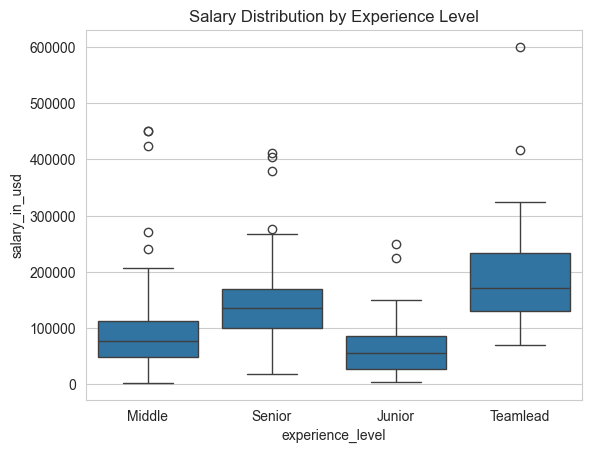

In [33]:
print(df.isnull().sum())         # Пропущенные значения
print(df.duplicated().sum())     # Дубликаты
print(df['experience_level'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['experience_level'], y=df['salary_in_usd'])
plt.title('Salary Distribution by Experience Level')
plt.show()


Due to the presence of extreme outliers and high variance within experience levels,  
the model struggles to learn meaningful salary patterns — resulting in low performance (low R²).  
Although Random Forest and XGBoost perform relatively better, the overall results remain limited.

**Conclusion:** This dataset is not well-suited for accurate salary prediction in its current state.  
It requires thorough cleaning, feature enrichment, and possibly more granular role information to build a reliable model.
